In [50]:
# import commonly used libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# import dataset

df = pd.read_csv('train.csv')
df.head()
#df_test = pd.read_csv('test.csv')

Number words female  Total words  Number of words lead  \
0                 1512         6394                2251.0   
1                 1524         8780                2020.0   
2                  155         4176                 942.0   
3                 1073         9855                3440.0   
4                 1317         7688                3835.0   

   Difference in words lead and co-lead  Number of male actors  Year  \
0                                   343                      2  1995   
1                                  1219                      9  2001   
2                                   787                      7  1968   
3                                  2623                     12  2002   
4                                  3149                      8  1988   

   Number of female actors  Number words male  Gross  Mean Age Male  \
0                        5               2631  142.0      51.500000   
1                        4               5236   37.0      39.125000   
2                        1               3079  376.0      42.500000   
3                        2               5342   19.0      35.222222   
4                        4               2536   40.0      45.250000   

   Mean Age Female  Age Lead  Age Co-Lead    Lead  
0        42.333333      46.0         65.0  Female  
1        29.333333      58.0         34.0    Male  
2        37.000000      46.0         37.0    Male  
3        21.500000      33.0         23.0    Male  
4        45.000000      36.0         39.0    Male

In [52]:
# is it necessary to convert binary categorical values?

from sklearn.preprocessing import LabelEncoder as le

df['Lead'] = le().fit_transform(df.Lead.values)
df.head()

Number words female  Total words  Number of words lead  \
0                 1512         6394                2251.0   
1                 1524         8780                2020.0   
2                  155         4176                 942.0   
3                 1073         9855                3440.0   
4                 1317         7688                3835.0   

   Difference in words lead and co-lead  Number of male actors  Year  \
0                                   343                      2  1995   
1                                  1219                      9  2001   
2                                   787                      7  1968   
3                                  2623                     12  2002   
4                                  3149                      8  1988   

   Number of female actors  Number words male  Gross  Mean Age Male  \
0                        5               2631  142.0      51.500000   
1                        4               5236   37.0      39.125000   
2                        1               3079  376.0      42.500000   
3                        2               5342   19.0      35.222222   
4                        4               2536   40.0      45.250000   

   Mean Age Female  Age Lead  Age Co-Lead  Lead  
0        42.333333      46.0         65.0     0  
1        29.333333      58.0         34.0     1  
2        37.000000      46.0         37.0     1  
3        21.500000      33.0         23.0     1  
4        45.000000      36.0         39.0     1

In [53]:
nan_total = sum(list(df.isnull().sum()))

print("Dataset length: " + str(len(df)))
print("Total number of missing values: " + str(nan_total) + "\n")

df.info()

Dataset length: 1039
Total number of missing values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female             

In [4]:
print("Listing all features and how many there are of each feature\n")
for col in df.columns:
    print("\033[1m" + col + "\033[0m")
    print(df[col].value_counts())
    print("\n")

Listing all features and how many there are of each feature

Number words female
0       21
1688     4
859      3
1120     3
1138     3
        ..
3495     1
718      1
719      1
2768     1
2796     1
Name: Number words female, Length: 895, dtype: int64


Total words
7074     3
8611     3
19960    2
11504    2
18864    2
        ..
4201     1
10953    1
5426     1
10958    1
6143     1
Name: Total words, Length: 1008, dtype: int64


Number of words lead
789.0     3
2498.0    3
3976.0    3
5306.0    2
1486.0    2
         ..
4454.0    1
1424.0    1
4241.0    1
2773.0    1
1666.0    1
Name: Number of words lead, Length: 964, dtype: int64


Difference in words lead and co-lead
694     4
622     4
352     3
503     3
597     3
       ..
2705    1
4756    1
673     1
680     1
2796    1
Name: Difference in words lead and co-lead, Length: 951, dtype: int64


Number of male actors
6     120
5     115
4     111
7     111
8     109
9      88
10     78
11     57
3      52
12     43
13     35
2 

Can observe that:
- Difference in sample size between certain features
- Lead has categorical values, must be numerical

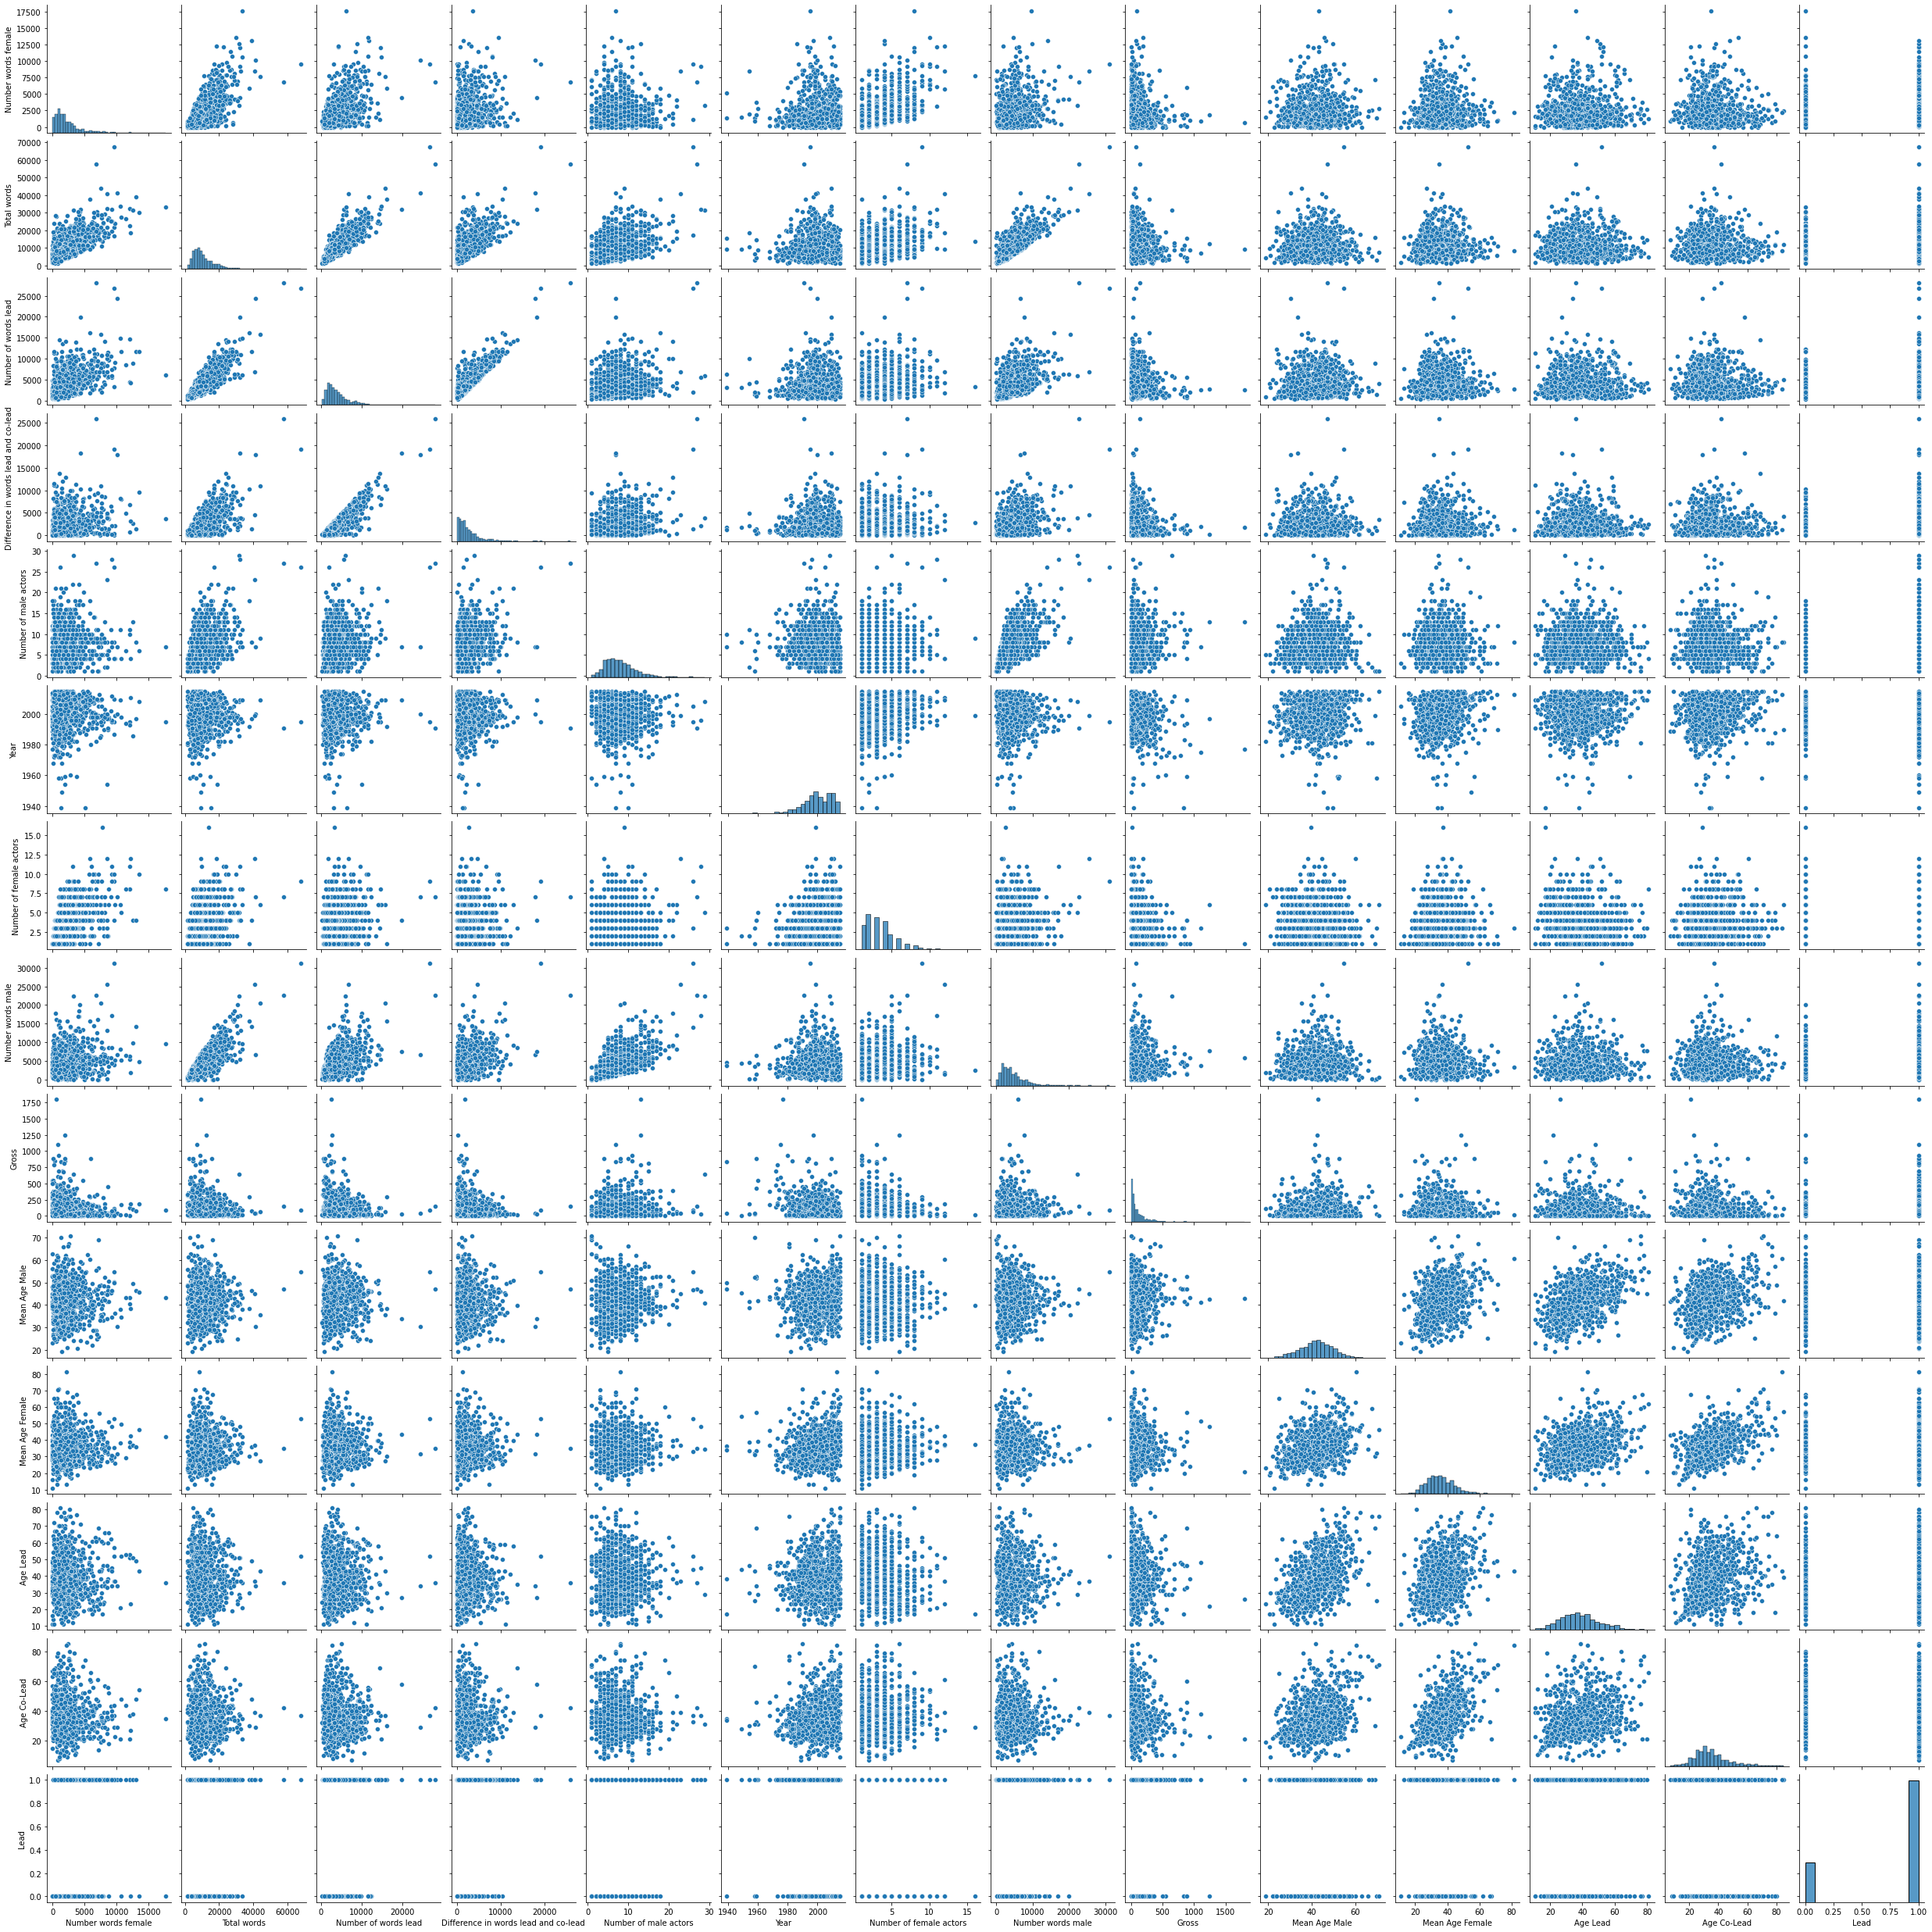

In [35]:
#plot distribution of data

sns.pairplot(df)
plt.show()

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

Number words female  Total words  Number of words lead  \
0             0.085627     0.076182              0.069572   
1             0.086306     0.112226              0.061258   
2             0.008778     0.042676              0.022459   
3             0.060766     0.128465              0.112367   
4             0.074584     0.095729              0.126584   

   Difference in words lead and co-lead  Number of male actors      Year  \
0                              0.013245               0.035714  0.736842   
1                              0.047171               0.285714  0.815789   
2                              0.030440               0.214286  0.381579   
3                              0.101545               0.392857  0.828947   
4                              0.121916               0.250000  0.644737   

   Number of female actors  Number words male     Gross  Mean Age Male  \
0                 0.266667           0.084473  0.078977       0.625000   
1                 0.200000           0.168111  0.020578       0.387019   
2                 0.000000           0.098857  0.209121       0.451923   
3                 0.066667           0.171515  0.010567       0.311966   
4                 0.200000           0.081423  0.022247       0.504808   

   Mean Age Female  Age Lead  Age Co-Lead  Lead  
0         0.445498  0.500000     0.743590   0.0  
1         0.260664  0.671429     0.346154   1.0  
2         0.369668  0.500000     0.384615   1.0  
3         0.149289  0.314286     0.205128   1.0  
4         0.483412  0.357143     0.410256   1.0

In [55]:
features = df.drop(['Lead'], axis=1)
labels = df['Lead']

features_scaled = df_scaled.drop(['Lead'], axis=1)
label_scaled = df_scaled['Lead']

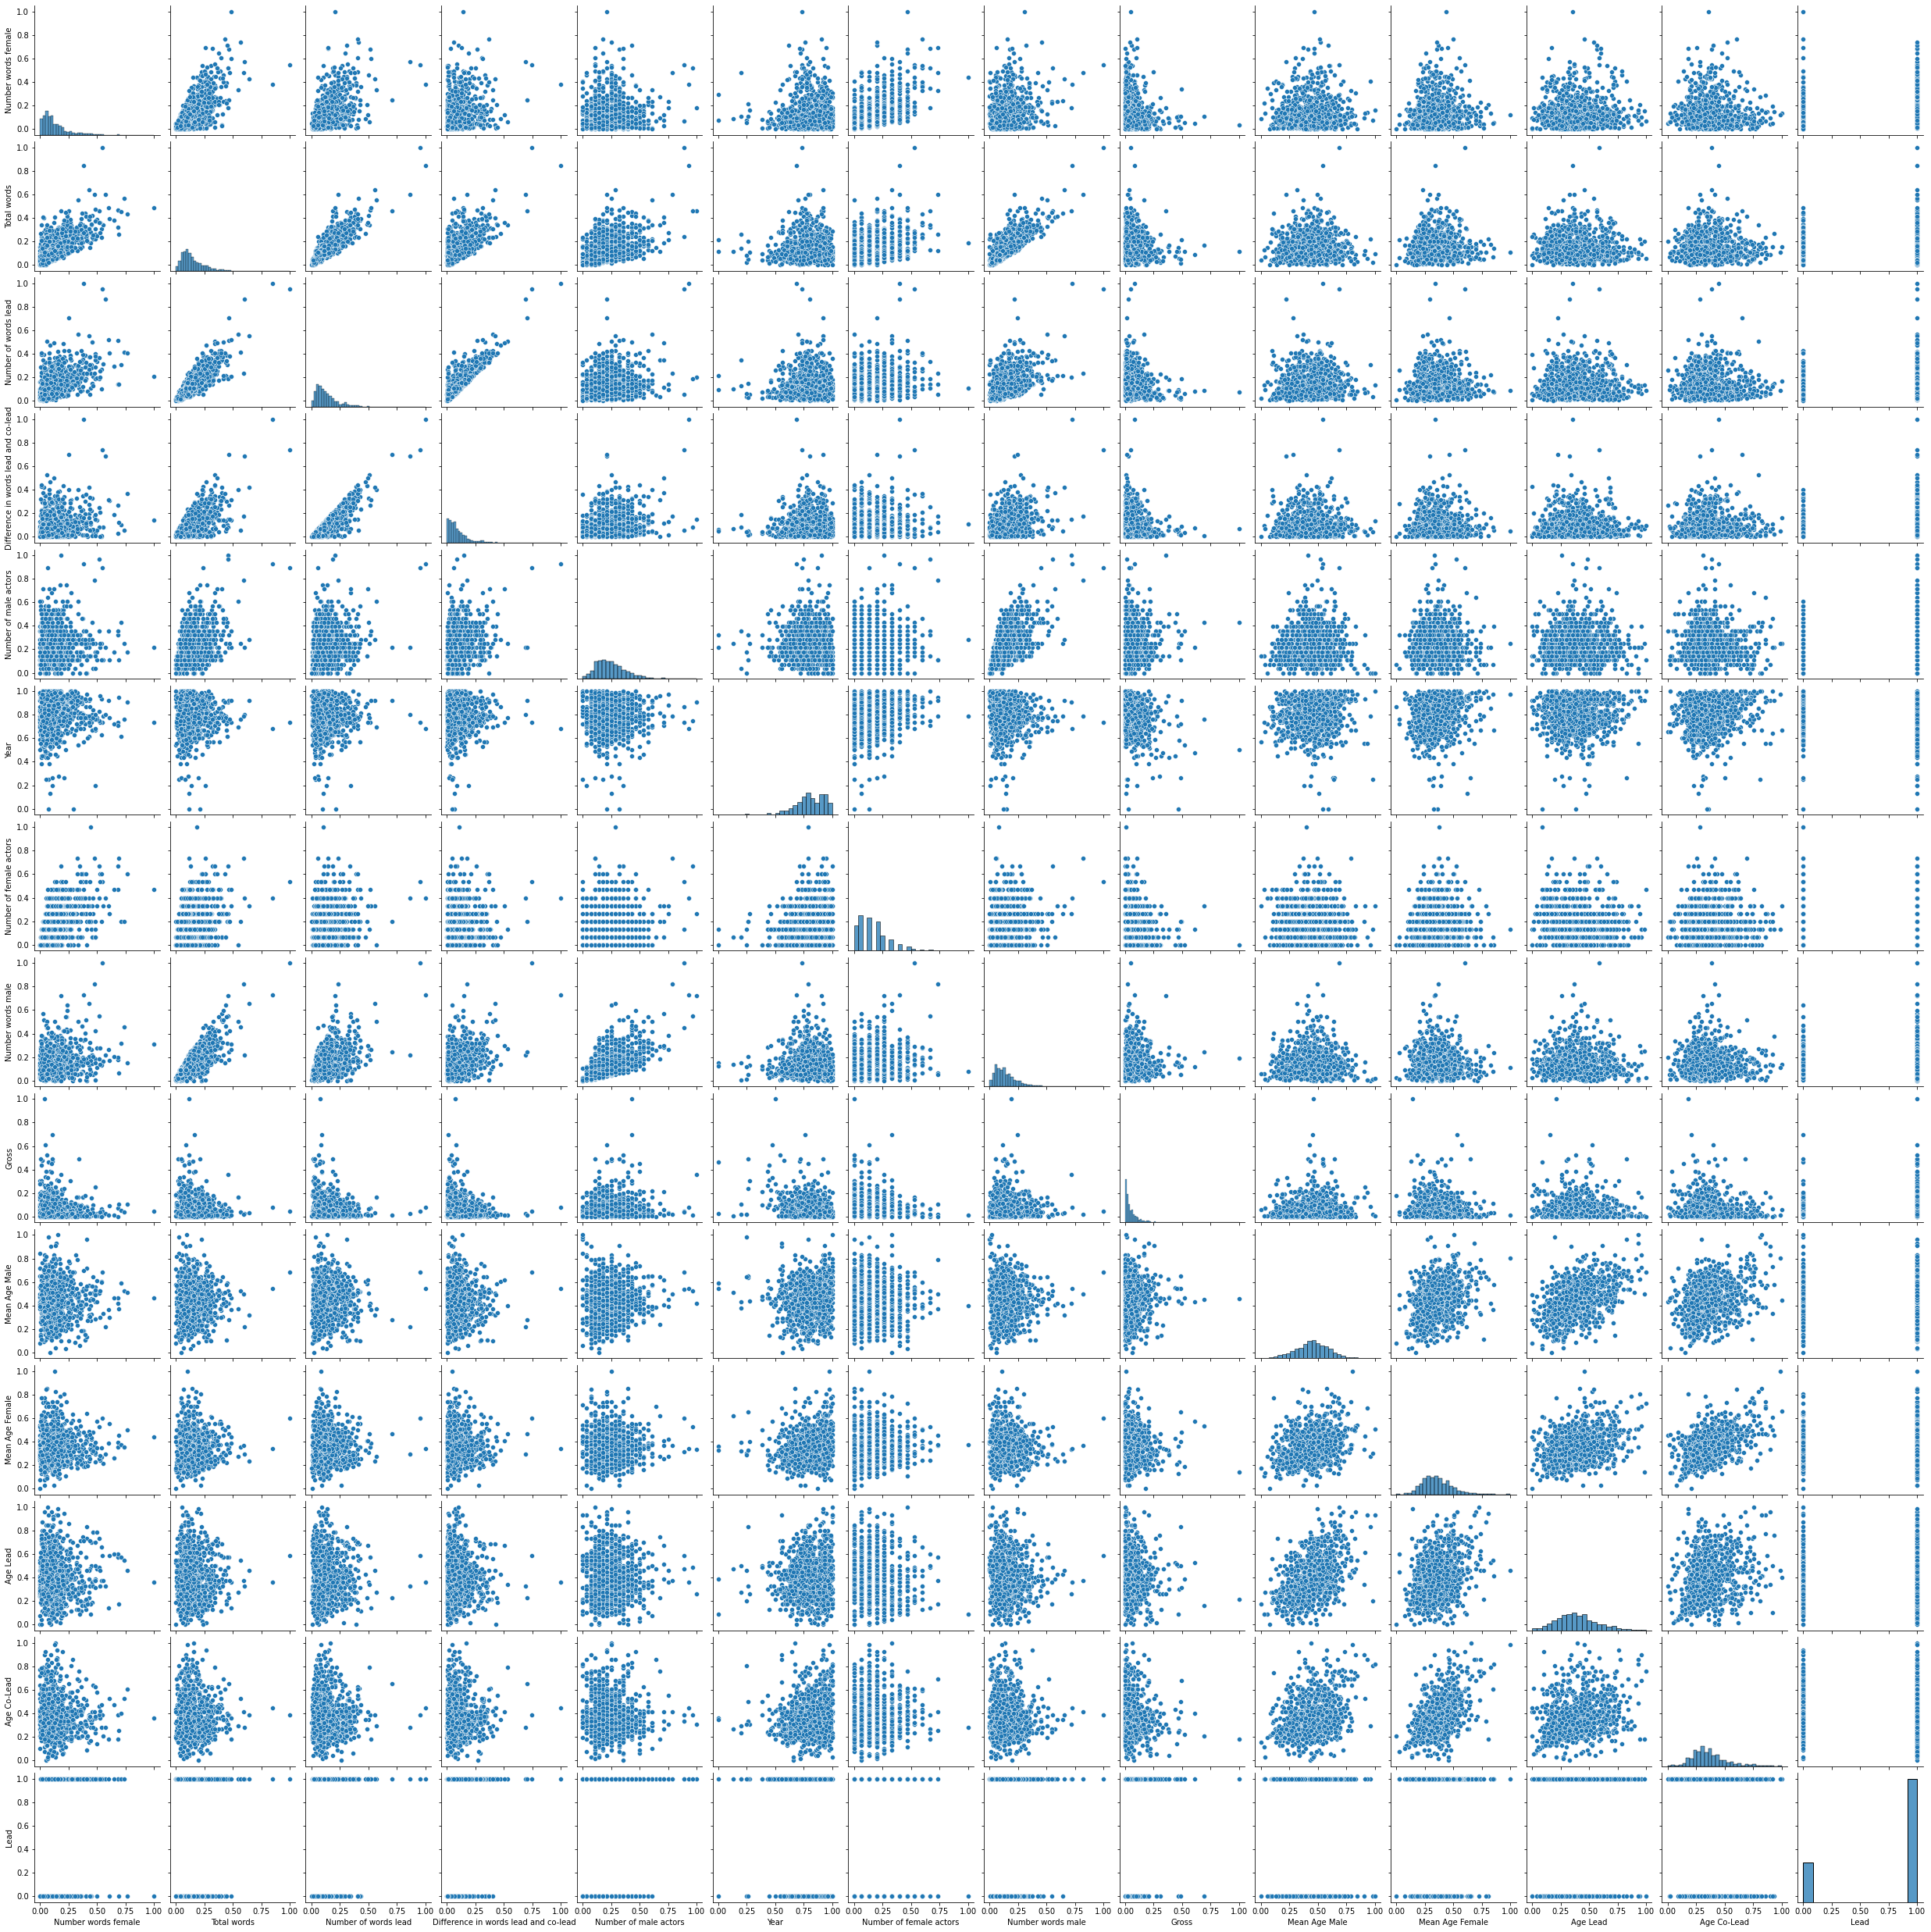

In [30]:
# plot distribution of data after scaling 
# (should be the same, as the relationship stays the same)

sns.pairplot(df_scaled)
plt.show()

In [74]:
# split into training and test set 



### Discriminant Analysis: QDA

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

score = 0
score_scaled = 0

for i in range(1, 51):
    X_train, X_test, y_train, y_test = train_test_split(
         features, label, train_size=0.8
    )

    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
         features_scaled, label_scaled, train_size=0.8
    )
    
    clf1 = QuadraticDiscriminantAnalysis()
    clf2 = QuadraticDiscriminantAnalysis()
    
    clf1.fit(X_train, y_train)
    score = score + clf1.score(X_test, y_test)
    
    clf2.fit(X_train_scaled, y_train_scaled)
    score_scaled = score_scaled + clf2.score(X_test, y_test)

print("Score: " + str(score/50))
print("Score scaled: " + str(score_scaled/50))

c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\pro

Score: 0.8497115384615384
Score scaled: 0.644326923076923


c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\jonathan\appdata\local\pro

In [49]:
features = df.drop(['Lead'], axis=1)
label = df['Lead']

X_train, X_test, y_train, y_test = train_test_split(
     features, label, train_size=0.8
)

clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
score = clf.score(X_test, y_test)

print(score)

0.8125


c:\users\jonathan\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Cross-validation 